In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [3]:
global_data = pd.read_csv('time_series_covid19_confirmed_global_iso3_regions.csv')
global_deaths = pd.read_csv('time_series_covid19_deaths_global_iso3_regions.csv')
global_recovered = pd.read_csv('time_series_covid19_recovered_global_iso3_regions.csv')

In [4]:
global_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
0,#adm1+name,#country+name,#geo+lat,#geo+lon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,#country+code,#region+main+code,#region+main+name,#region+sub+code,#region+sub+name,#region+intermediate+code,#region+intermediate+name
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,11.0,14.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,21.0,22.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,152.0,173.0,193.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,21.0,22.0,AND,150,Europe,39,Southern Europe,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,FLK,19,Americas,419,Latin America and the Caribbean,5,South America
260,Saint Pierre and Miquelon,France,46.8852,-56.3159,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,SPM,19,Americas,21,Northern America,NaN,NaN
261,NaN,South Sudan,6.877000000000001,31.307,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,SSD,2,Africa,202,Sub-Saharan Africa,14,Eastern Africa
262,NaN,Western Sahara,24.2155,-12.8858,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,ESH,2,Africa,15,Northern Africa,NaN,NaN


In [22]:
sns.set
cases = global_data
cases = cases.drop(columns = ['Province/State',
                   'Lat',
                   'Long', 
                   'ISO 3166-1 Alpha 3-Codes',
                   'Region Code', 
                   'Sub-region Code', 
                   'Sub-region Name', 
                   'Intermediate Region Code', 
                   'Intermediate Region Name'])
cases = cases.drop([0])
countries = cases['Country/Region']
cases.index = countries
cases = cases.drop(columns = ['Country/Region','Region Name'])
cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,120.0,170.0,174.0,237.0,273.0,281.0,299.0,349.0,367.0,423.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,212.0,223.0,243.0,259.0,277.0,304.0,333.0,361.0,377.0,383.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,511.0,584.0,716.0,847.0,986.0,1171.0,1251.0,1320.0,1423.0,1468.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,334.0,370.0,376.0,390.0,428.0,439.0,466.0,501.0,525.0,545.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,7.0,7.0,8.0,8.0,8.0,10.0,14.0,16.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
South Sudan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0


In [24]:
# split the data into train and test: https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
msk = np.random.rand(len(cases)) < 0.8
train = cases[msk]
test = cases[~msk]


In [ ]:
# give the model country, date and previous cases, returns # of expected cases for that day (total of all previous days)
labels = list(cases.index) # all the countries, each an element of Y in order
for country in labels:
    model = SVC()
#this is where i've been running into a lot of errors trying to redo what i did below backwards so that it calculates the number of cases instead of the date 

In [33]:
# plot the values of each country over time, seperated by region
dates = list(cases.columns) # date values (ie column names)

results = []
lst = train

for date in dates:
    results.append(train)


SyntaxError: unexpected EOF while parsing (<ipython-input-33-da0b88979970>, line 11)

Train on the dates (and country), then get the number of cases predicted for day x

In [49]:
# plot the values of each country over time, seperated by region
X = list(cases.columns) # date values (ie column names)
Y = list(cases.index) # all the countries, each an element of Y in order
labels = [] # labels, i.e. country names
X.pop(0)
X.pop(len(X)-1)

#for i in range(len(cases)): 
    #labels.append(cases['Country/Region'].iloc[i])
X.pop(0)
temp = cases.T

for i in range(1,len(X)):
    try:
        Y.append(temp[i].to_frame())
        
    except:
        continue

labels = cases[cases.columns[0]]
temp

,1,2,3,4,5,6,7,8,9,10,...,254,255,256,257,258,259,260,261,262,263
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Botswana,Burundi,Sierra Leone,Netherlands,Malawi,United Kingdom,France,South Sudan,Western Sahara,Sao Tome and Principe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/4/20,299,333,1251,466,10,15,1451,770,93,2493,...,4,3,4,2,4,1,0,0,0,0
4/5/20,349,361,1320,501,14,15,1451,822,96,2580,...,6,3,6,2,4,2,1,1,4,0
4/6/20,367,377,1423,525,16,15,1554,833,96,2637,...,6,3,6,2,5,2,1,1,4,4
4/7/20,423,383,1468,545,17,19,1628,853,96,2686,...,6,3,6,2,8,2,1,2,4,4


In [24]:
newY = []
for country in range(len(Y)):
    entry = []
    lables = Y[country].iloc[0]
    for item in range(1,len(Y[country])-1):
        entry.append(int(Y[country].iloc[item]))
    newY.append(list(entry))
X.pop(0)
newY

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  4,
  4,
  5,
  7,
  7,
  7,
  11,
  16,
  21,
  22,
  22,
  22,
  24,
  24,
  40,
  40,
  74,
  84,
  94,
  110,
  110,
  120,
  170,
  174,
  237,
  273,
  281,
  299,
  349,
  367,
  423],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  10,
  12,
  23,
  33,
  38,
  42,
  51,
  55,
  59,
  64,
  70,
  76,
  89,
  104,
  123,
  146,
  174,
  186,
  197,
  212,
  223,
  243,
  259,
  277,
  304,
  333,
  361,
  377,
  383],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [8]:
clf = SVC()
clf.fit(newY, X)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
my_test = []
my_temp = test.T
for i in range(1,len(list(my_temp.columns))):
    try:
        my_test.append(my_temp[i].to_frame())
    except:
        continue

new_test = []
for country in range(len(my_test)):
    entry = []
    for item in range(1,len(my_test[country])-1):
        entry.append(int(my_test[country].iloc[item]))
    new_test.append(list(entry))
print(new_test)
clf.predict(new_test)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 8, 12, 12, 17, 19, 19, 31, 34, 45, 56, 68, 79, 97, 128, 158, 266, 301, 387, 387, 502, 589, 690, 745, 820, 1054, 1054, 1133, 1265, 1451, 1451, 1554, 1628], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 13, 23, 50, 109, 169, 200, 239, 267, 314, 314, 559, 689, 886, 1058, 1243, 1486, 1795, 2257, 2815, 3401, 3743, 4269, 4937, 6235, 7284, 9134, 10836, 11899, 12775, 13964, 15348, 16770, 18431, 19691, 20814, 22194], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 5, 7, 11, 13, 18, 24, 25, 26, 38, 63, 89, 93, 126, 136, 166, 176, 191, 237, 258, 323, 368, 420, 459, 533, 579, 624, 654, 674, 764], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

array(['1/30/20', '2/16/20', '2/20/20', '2/28/20'], dtype='<U7')

In [10]:
#labels[70] is china
#labels[225] is US
#labels[137] is italy

In [31]:
graphY = [0] * len(newY[0])
for label in range(len(labels)):
    if labels[label]==('China'):
        for element in newY[label]:
            graphY[label] = (graphY[label] + element) / 2

77

Text(0.5, 1.0, 'Number of cases in china per day')

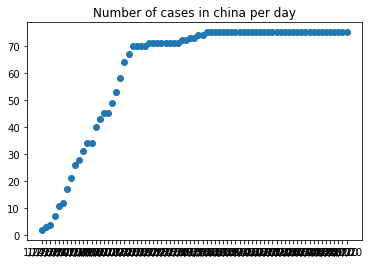

In [13]:
plt.scatter(X,graphY)
plt.title("Number of cases in China per day")

In [20]:
graphY2 = newY[225]
graphY.pop(0)
graphY.pop(0)

IndexError: list index out of range

In [19]:
plt.scatter(X,graphY)
plt.title("Number of cases in US per day")

[1,
 2,
 2,
 2,
 5,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 12,
 15,
 17,
 17,
 18,
 24,
 24,
 25,
 30,
 31,
 33,
 37,
 37,
 38,
 41,
 41,
 41,
 43,
 43,
 44,
 44,
 44]

In [25]:
labels

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'China',
 'Colombia',
 'Congo